# Data set Context

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to March 2019, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.25 million accident records in this dataset. 

# Task  : 
In this project we investigate the relationship between severity of the accident and Mulitple Features. Also we predict the severity of the accident based on mulitple features.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn import metrics

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\US_Accidents_May19 classification.csv" )

In [3]:
original_data .head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


This Shows Data has 49 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(2243939, 49)

This dataset has 2243939 enteries/rows and 49 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

Result of this code shows 14 features are of float data type , 1 are of int data type , 13 are of boolean type and 21 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.727177e+06,2.243939e+06,2.243939e+06,2.243939e+06,516762.000000,516762.000000,2.243939e+06,785537.000000,2.181674e+06,391569.000000,2.179472e+06,2.186659e+06,2.172579e+06,1.800985e+06,264473.000000
mean,2.073527e+02,2.382692e+00,3.646348e+01,-9.485567e+01,37.443109,-96.527543,2.879095e-01,5625.281008,6.123244e+01,26.042067,6.592758e+01,3.003747e+01,9.124096e+00,8.844042e+00,0.060439
std,1.940527e+01,5.488029e-01,4.958759e+00,1.709453e+01,5.126585,17.986406,1.532341e+00,11071.872897,1.914616e+01,13.478333,2.243013e+01,2.267242e-01,2.986359e+00,4.973200e+00,0.439698
min,2.000000e+02,0.000000e+00,2.457022e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,1.000000,-7.780000e+01,-65.900000,4.000000e+00,0.000000e+00,0.000000e+00,1.200000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.348468e+01,-1.171362e+02,33.887450,-117.870577,0.000000e+00,803.000000,4.890000e+01,19.200000,5.000000e+01,2.992000e+01,1.000000e+01,5.800000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.586428e+01,-8.818469e+01,38.038480,-90.192310,0.000000e+00,2672.000000,6.300000e+01,28.700000,6.800000e+01,3.003000e+01,1.000000e+01,8.100000e+00,0.010000
75%,2.010000e+02,3.000000e+00,4.042111e+01,-8.085453e+01,41.393320,-80.895040,1.000000e-02,6846.000000,7.590000e+01,36.400000,8.500000e+01,3.015000e+01,1.000000e+01,1.150000e+01,0.040000
max,4.060000e+02,4.000000e+00,4.900076e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,961052.000000,1.706000e+02,45.200000,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,10.800000


# Null Values
First we check null values in each features and remove those features which maximum null values

In [7]:
original_data.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

clearly there are some features which has around 18,00,000 null values.
we are doing classification on the basis of multiple features so we remove those features which ahs more than 10,00,000 nullvalues

In [8]:
data_wo_null = original_data.dropna(axis = 'columns' , thresh = 1000000)
data_wo_null.shape

(2243939, 44)

Now we drop rows/enteries which has null values

In [9]:
data_wo_nan = data_wo_null.dropna()
data_wo_nan .shape

(1369223, 44)

### Now we have data set of 13,69,223 enteries and 44 features without any null values

# Correlation between continuous valued features

In [10]:
cont_features = data_wo_nan.select_dtypes(exclude=['object','bool'])

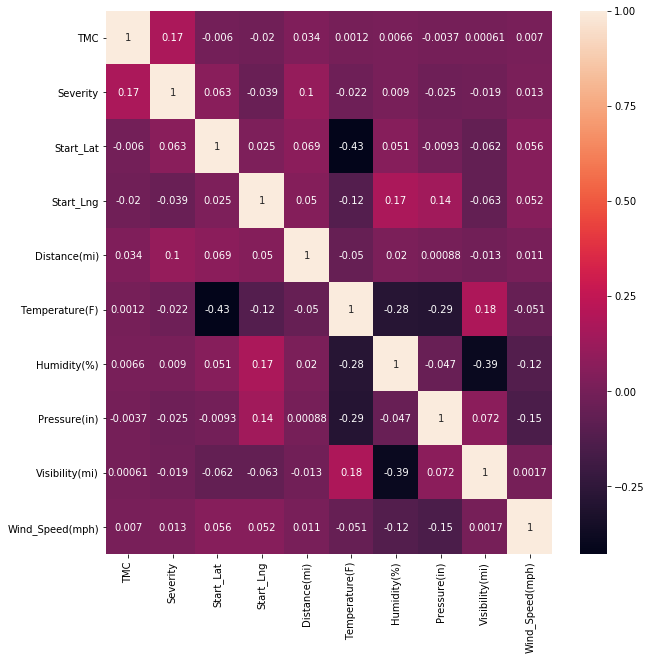

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cont_features.corr(method='pearson'), annot=True)
plt.show()

From this heatmap of correlation, it is clear that features are not that related with each other.

# Feature Selection
First we have 49 features but after droping features with alot of nan values we left with 44 features. So, we need to select top 10 features which help to predict severity of the accident.

In [12]:
bool_features = data_wo_nan.select_dtypes(include='bool')
bool_features.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False


**Note** : Features with boolean values actually have True and False.

So we change these values in numbers using label encoder.

In [13]:
from sklearn import preprocessing
bool_features = bool_features.apply( preprocessing.LabelEncoder().fit_transform )
bool_features.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
obj_features = data_wo_nan.select_dtypes(include = 'object')
obj_features.head(2)

,ID,Source,Start_Time,End_Time,Description,Street,Side,City,County,State,...,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,A-3,MapQuest,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,...,US,US/Eastern,KI69,2016-02-08 06:56:00,SW,Overcast,Night,Night,Day,Day
3,A-4,MapQuest,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,OH,...,US,US/Eastern,KDAY,2016-02-08 07:38:00,SW,Mostly Cloudy,Night,Day,Day,Day


Clearly by seprating data by dtype of features. we see severity of accident will depend on continuous features and boolean features.

Now we concat continuous and boolean features in features variable. Then we do Fature Selection on them.

In [15]:
all_req_features = pd.concat([cont_features,bool_features],axis=1)

In [16]:
all_req_features.shape

(1369223, 23)

In [17]:
features = all_req_features.loc[: , all_req_features.columns != 'Severity']

In [18]:
target = all_req_features.loc[: , all_req_features.columns == 'Severity']

### For Feature Selection we use Annova function in SelectKBest 
First we import some library

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [20]:
bestfeatures = SelectKBest(score_func=f_classif,k=3)

In [21]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.head()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0
0,10954.348985
1,1469.217093
2,558.568156
3,4735.296281
4,176.852684


In [22]:
feature_column_name=pd.DataFrame(features.columns)

In [23]:
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

,Features,Score
0,TMC,10954.348985
1,Start_Lat,1469.217093
2,Start_Lng,558.568156
3,Distance(mi),4735.296281
4,Temperature(F),176.852684
5,Humidity(%),30.338199
6,Pressure(in),222.612374
7,Visibility(mi),129.708795
8,Wind_Speed(mph),58.599173
9,Amenity,1972.502765


### Top 10 Features with best scores

In [24]:
print(feature_score_df.nlargest(10,'Score'))

          Features         Score
20  Traffic_Signal  26156.271148
0              TMC  10954.348985
11        Crossing   9104.574554
13        Junction   5982.998577
3     Distance(mi)   4735.296281
9          Amenity   1972.502765
18            Stop   1716.694927
1        Start_Lat   1469.217093
17         Station   1326.356807
2        Start_Lng    558.568156


### This Dataset has instances over 13 Lakh. Its too large to train our data on it. So we randomly select 50000 instances and then fit our model on them.

# Model Dataset

In [25]:
import random
index_no_model_dataset = random.sample(range(1369223), 70000)
len(index_no_model_dataset)

70000

In [26]:
temp_model_data = all_req_features[['Traffic_Signal' , 'TMC' , 'Crossing' , 'Junction' , 'Distance(mi)' , 'Amenity' , 
                               'Stop' , 'Start_Lat' , 'Station' , 'Start_Lng' , 'Severity']]
temp_model_data .shape

(1369223, 11)

In [27]:
model_data = temp_model_data.loc[index_no_model_dataset]

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [28]:
model_data.shape

(70000, 11)

In [29]:
model_data.isnull().sum()

Traffic_Signal    14015
TMC               14015
Crossing          14015
Junction          14015
Distance(mi)      14015
Amenity           14015
Stop              14015
Start_Lat         14015
Station           14015
Start_Lng         14015
Severity          14015
dtype: int64

In [30]:
model_data = model_data.dropna()

In [31]:
print(f"Number of rows in Model Dataset is {model_data.shape[0]}.\nNumber of columns in Model Dataset is {model_data.shape[1]}.")

Number of rows in Model Dataset is 55985.
Number of columns in Model Dataset is 11.


# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = severity of the accident ( Severity )

-> Independent Feature/Variable, x = Multiple Features

In [32]:
x = model_data[['Traffic_Signal' , 'TMC' , 'Crossing' , 'Junction' , 'Distance(mi)' , 'Amenity' , 'Stop' ,
                'Start_Lat' , 'Station' , 'Start_Lng' ]] .values
y = model_data['Severity']

In [33]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[   0.        201.          0.          0.          0.          0.
     0.         47.542889    0.       -122.359558]
 [   0.        241.          0.          1.          0.          0.
     0.         40.429546    0.        -79.999031]
 [   0.        201.          0.          0.          0.25        0.
     0.         29.548086    0.        -98.507011]
 [   0.        201.          0.          0.          0.          0.
     0.         33.974655    0.       -118.280609]
 [   0.        201.          0.          0.          0.          0.
     0.         37.748791    0.       -122.404007]]
Shape of Independent(x) variable is (55985, 10)


In [34]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

612292     2.0
607938     2.0
908509     2.0
1353278    3.0
808193     2.0
Name: Severity, dtype: float64
Shape of Dependent(y) variable is (55985,)


# Data Visualization

Value count of Severity of accident 
2.0    35811
3.0    20097
4.0       47
1.0       30
Name: Severity, dtype: int64


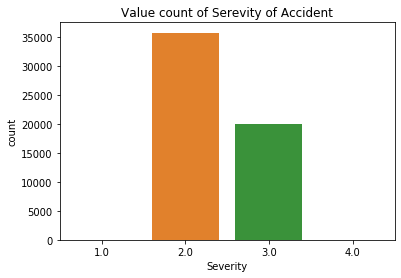

In [35]:
print(f"Value count of Severity of accident \n{model_data['Severity'].value_counts()}")
sns.countplot(y)
plt.xlabel("Severity")
plt.title("Value count of Serevity of Accident")
plt.show()

Count value of Serevity of accident of level 0 , 1 , 4 is so low that it is not visible in this plot.

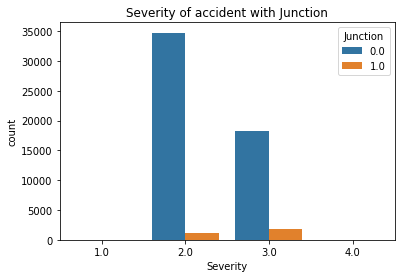

In [36]:
# Junction = Point of Accident is a junction or not
sns.countplot(model_data['Severity'],hue=model_data['Junction'])
plt.title("Severity of accident with Junction")
plt.show()

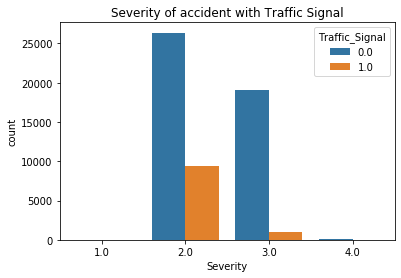

In [37]:
sns.countplot(model_data['Severity'],hue=model_data['Traffic_Signal'])
plt.title("Severity of accident with Traffic Signal")
plt.show()

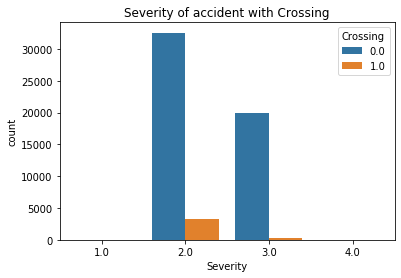

In [38]:
sns.countplot(model_data['Severity'],hue=model_data['Crossing'])
plt.title("Severity of accident with Crossing")
plt.show()

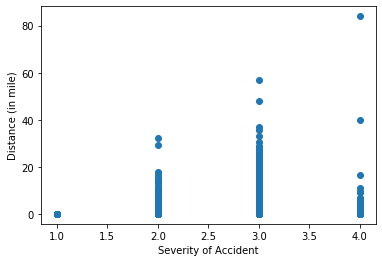

In [39]:
plt.scatter(model_data['Severity'],model_data['Distance(mi)'])
plt.xlabel("Severity of Accident")
plt.ylabel("Distance (in mile)")
plt.show()

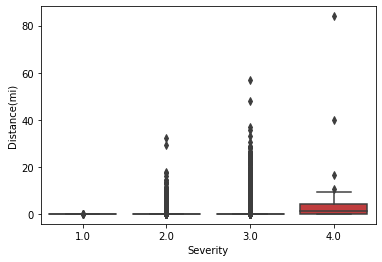

In [40]:
sns.boxplot(model_data['Severity'],model_data['Distance(mi)'])
plt.show()

From the boxplot, we can see that there are many outliers in data.

# Data Preprocessing

In this model, there are multiple independent features. Also, each independent feature has different range.So, we need to make equal range for all independent features.

First we use **standard scalar** from **preprocessing** module to rescale all features.

In [41]:
x = preprocessing.RobustScaler().fit(x).transform(x)
x[0:5] 

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.64921165,  0.        , -1.10500942],
       [ 0.        , 40.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.66611435,  0.        ,  0.26172999],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.25      ,
         0.        ,  0.        , -0.83775434,  0.        , -0.33541994],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.22598179,  0.        , -0.97340434],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.29562147,  0.        , -1.10644354]])

### Now we split our data in train and test using train_test_split function

In [42]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25,random_state=4)

In [43]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (41988, 10) and test_x : (13997, 10)
Size of train_y : (41988,) and test_y : (13997,)


# 1). Logistic Regression Algorithm

### First We import Logistic Regression model from linear_model Module

In [44]:
from sklearn import linear_model
LoReg = linear_model .LogisticRegression(C=0.01,multi_class='multinomial', solver='newton-cg')

### Now we fit LoReg model using train set

In [45]:
LoReg .fit( train_x , train_y )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Now LoReg Model is ready.

### Predicting Values for test_x

In [46]:
pred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [47]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

,Actual values,Predicted values
285636,3.0,2.0
1237679,2.0,3.0
1336330,2.0,2.0
1184582,2.0,2.0
266266,3.0,3.0
1238767,3.0,2.0
504032,2.0,3.0
1174405,2.0,2.0
1034619,2.0,2.0
23755,3.0,3.0


## Here we have 4 type of classifiers. So, ROC curve can't be made.

# Evaluation of LoReg Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [48]:
LoReg.score(train_x,train_y)

0.6898637706011241

In [49]:
lras=metrics.accuracy_score(test_y,pred_y)
lras

0.6867900264342359

In [50]:
cnf_matrix=confusion_matrix(test_y,pred_y)
cnf_matrix

array([[   0,   12,    0,    0],
       [   0, 8128,  848,    0],
       [   0, 3513, 1485,    0],
       [   0,    4,    7,    0]], dtype=int64)

In [51]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.70      0.91      0.79      8976
         3.0       0.63      0.30      0.40      4998
         4.0       0.00      0.00      0.00        11

    accuracy                           0.69     13997
   macro avg       0.33      0.30      0.30     13997
weighted avg       0.67      0.69      0.65     13997



C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### From above report. Its clear this model is not so good to classify the Serevity of accident. Its accuracy score is also 68%.

# 2). K- Nearest Neighbour Algorithm

### First We import KNeighborsClassifier model from neighbors Module

To do modeling we have to take some value of k.
let k = 4

In [52]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
KNN=KNeighborsClassifier(n_neighbors=k)

### Now we fit LoReg model using train set

In [53]:
KNN.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Now KNN Model is ready.

### Predicting Values for test_x

In [54]:
kpred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [55]:
kcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':kpred_y})
kcomp_df.head()

,Actual values,Predicted values
285636,3.0,2.0
1237679,2.0,3.0
1336330,2.0,2.0
1184582,2.0,2.0
266266,3.0,3.0


For better result we **repeat this algorithm for k = 1 to k = 10**

We just find accuracy score and decide for which value of k our KNN model is best.

In [56]:
Ks=10
mean_acc=np.zeros((Ks))

for n in range(1,Ks+1):
    KnN=KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y)
    KPred_y=KnN.predict(test_x)
    mean_acc[n-1]=metrics.accuracy_score(test_y,KPred_y)


In [57]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc}")

Mean Accuracy for k=1 to 10 : [0.81088805 0.79102665 0.80367222 0.79245553 0.7997428  0.79667072
 0.79667072 0.79467029 0.7933843  0.78945488]


In [58]:
print( "The best accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy is 0.8108880474387369 with k = 1


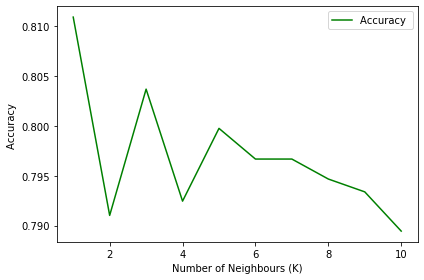

In [59]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

## From above graph, its clear Best accuracy of this model is for k = 1 and lowest accuracy is for k =  10

Also, lowest accuarcy of this model is greater than logistic regression model for same data.

# 3). Decision Tree Algorithm

### First We import DecisionTreeClassifier model from tree Module

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtre=DecisionTreeClassifier(criterion='entropy',max_depth=7)

### Now we fit dtre model using train set

In [61]:
dtre.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Now dtre Model is ready.

### Predicting Values for test_x

In [62]:
dtpred_y=dtre.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [63]:
dtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':dtpred_y})
dtcomp_df.head()

,Actual values,Predicted values
285636,3.0,3.0
1237679,2.0,3.0
1336330,2.0,2.0
1184582,2.0,2.0
266266,3.0,3.0


# Evaluation of dtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [64]:
dtre.score(test_x,test_y)

0.7053654354504537

In [65]:
dtcnf_matrix=confusion_matrix(test_y,dtpred_y)
dtcnf_matrix

array([[   0,   11,    1,    0],
       [   0, 7522, 1453,    1],
       [   0, 2645, 2351,    2],
       [   0,    2,    9,    0]], dtype=int64)

In [66]:
dtas=metrics.accuracy_score(test_y,dtpred_y)
dtas

0.7053654354504537

In [67]:
print(classification_report(test_y,dtpred_y))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.74      0.84      0.79      8976
         3.0       0.62      0.47      0.53      4998
         4.0       0.00      0.00      0.00        11

    accuracy                           0.71     13997
   macro avg       0.34      0.33      0.33     13997
weighted avg       0.69      0.71      0.69     13997



C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# -> Decision tree using Id3Estimator

### First We import Id3Estimator model from id3 library

In [68]:
from id3 import Id3Estimator
estimator=Id3Estimator()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Now we fit using train set

In [69]:
idt=estimator.fit(train_x,train_y)

### Now idt Model is ready.

### Predicting Values for test_x

In [70]:
idtpred_y=idt.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [71]:
idtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':idtpred_y})
idtcomp_df.head()

,Actual values,Predicted values
285636,3.0,3.0
1237679,2.0,3.0
1336330,2.0,2.0
1184582,2.0,2.0
266266,3.0,3.0


# Evaluation of idtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [72]:
idtcnf_matrix=confusion_matrix(test_y,idtpred_y)
idtcnf_matrix

array([[   0,   11,    1,    0],
       [   0, 7634, 1342,    0],
       [   0, 2734, 2264,    0],
       [   0,    1,   10,    0]], dtype=int64)

In [73]:
idtas=metrics.accuracy_score(test_y,idtpred_y)
idtas

0.7071515324712438

In [74]:
print(classification_report(test_y,idtpred_y))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.74      0.85      0.79      8976
         3.0       0.63      0.45      0.53      4998
         4.0       0.00      0.00      0.00        11

    accuracy                           0.71     13997
   macro avg       0.34      0.33      0.33     13997
weighted avg       0.70      0.71      0.69     13997



C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Clearly, From above Accuracy score of decision tree by DecisionTreeClassifier and by ID3 estimator are almost same.
But it is litle more than Logistic regression and very less than KNN Classification method.

# 3). Naive Bayes Classifier

We use Gaussian Naive Bayes Classifier because it is multinomial classification and input features are continues features.

### First We import GaussianNB from naive_byes Module from sklearn Package

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

### Now we fit gnb model using train set

In [78]:
gnb.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Now gnb Model is ready.

### Predicting Values for test_x

In [79]:
gnbpred_y = gnb.predict(test_x)
gnbcomp_df = pd.DataFrame({'Actual values' : test_y,'Predicted values' : gnbpred_y})
gnbcomp_df.head()

,Actual values,Predicted values
285636,3.0,4.0
1237679,2.0,4.0
1336330,2.0,1.0
1184582,2.0,4.0
266266,3.0,4.0


# Evaluation of gnb Model

In [80]:
gnb.score(test_x,test_y)

0.12545545474030148

In [81]:
gnbas = metrics.accuracy_score(test_y,gnbpred_y)
gnbas

0.12545545474030148

In [82]:
gnbcnf_matrix = confusion_matrix(test_y,gnbpred_y)
gnbcnf_matrix

array([[   2,    0,    1,    9],
       [1328,  118, 1590, 5940],
       [ 117,   29, 1628, 3224],
       [   0,    1,    2,    8]], dtype=int64)

In [83]:
print(classification_report(test_y,gnbpred_y))

              precision    recall  f1-score   support

         1.0       0.00      0.17      0.00        12
         2.0       0.80      0.01      0.03      8976
         3.0       0.51      0.33      0.40      4998
         4.0       0.00      0.73      0.00        11

    accuracy                           0.13     13997
   macro avg       0.33      0.31      0.11     13997
weighted avg       0.69      0.13      0.16     13997



# Accuracy Score Comaprision

In [84]:
Scores = pd.DataFrame([lras, mean_acc.max(), dtas, idtas,gnbas], index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model using DecisionTreeClassifier','Decison Tree Model using ID3 Estimator','Gaussian Naive Bayes Classifier'], 
             columns=['Error'])
Scores

,Error
Logistic Regression Model,0.686790
KNN Model,0.810888
Decision Tree Model using DecisionTreeClassifier,0.705365
Decison Tree Model using ID3 Estimator,0.707152
Gaussian Naive Bayes Classifier,0.125455


# Conclusion

KNN Model's predictiion is much better than all other models especially more than Naive Bayes classifier.

Naive Baqes Classifier is worst model for this Dataset whose accuracy score is 12.55% and KNN Model is best which accuracy score 81.09%